### Curso de Python para Finanças Quantitativas
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [8]:
#pip install yfinance

In [9]:
#pip install pandas_datareader

In [10]:
# Carregando as bibliotecas necessarias

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Configuraçoes iniciais

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2022-11-13"

In [12]:
# Coleta dos dados

df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600
2022-11-10,113579.0,113579.0,108516.0,109775.0,109775.0,26029300
2022-11-11,109775.0,113010.0,109408.0,111820.0,111820.0,25038700


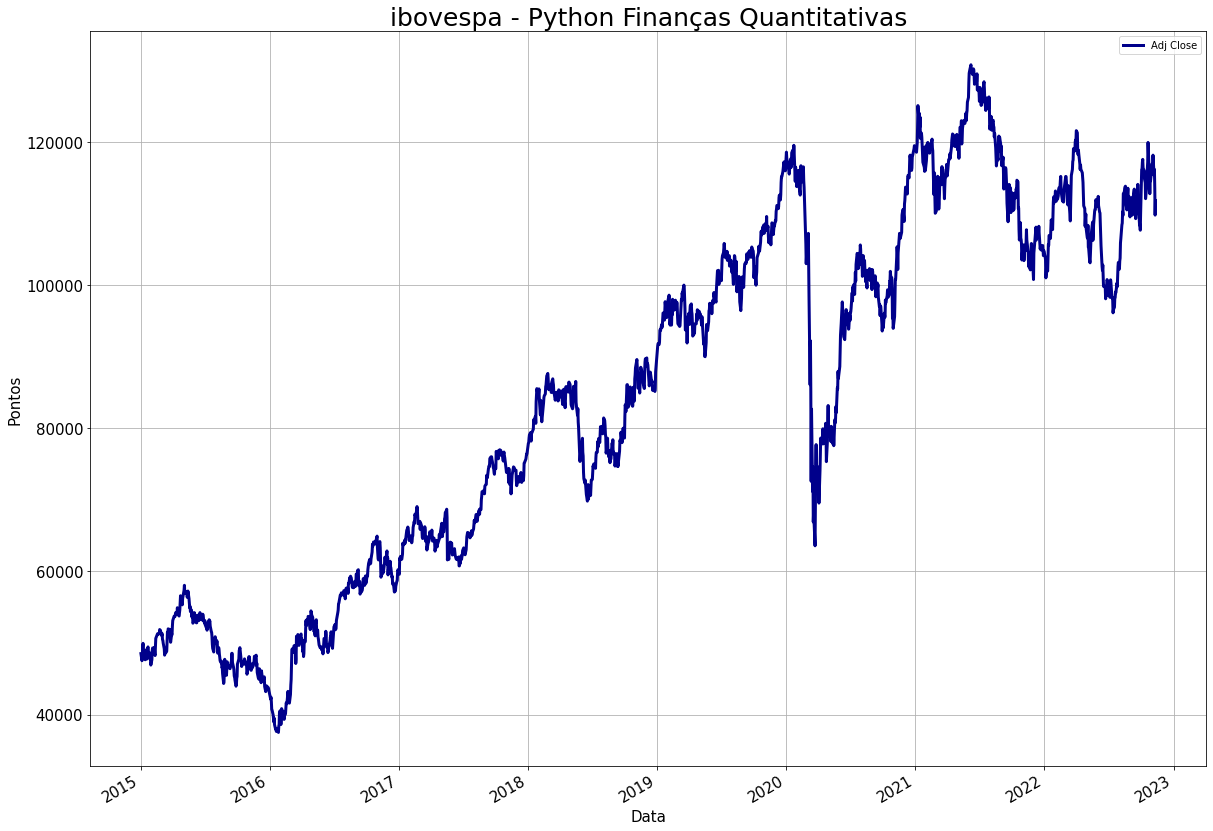

In [15]:
# Primeiro grafico

df["Adj Close"].plot(grid = True, figsize = (20, 15), linewidth = 3, fontsize = 15, color = "darkblue")
plt.xlabel("Data", fontsize = 15);
plt.ylabel("Pontos", fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas", fontsize = 25);
plt.legend();

In [6]:
# Calculando as bandas de bollinger

# Parametros iniciais
periodo = 50
desvios = 2

df["desvio"] = df["Adj Close"].rolling(periodo).std()
df["MM"] = df["Adj Close"].rolling(periodo).mean()
df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)

In [7]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

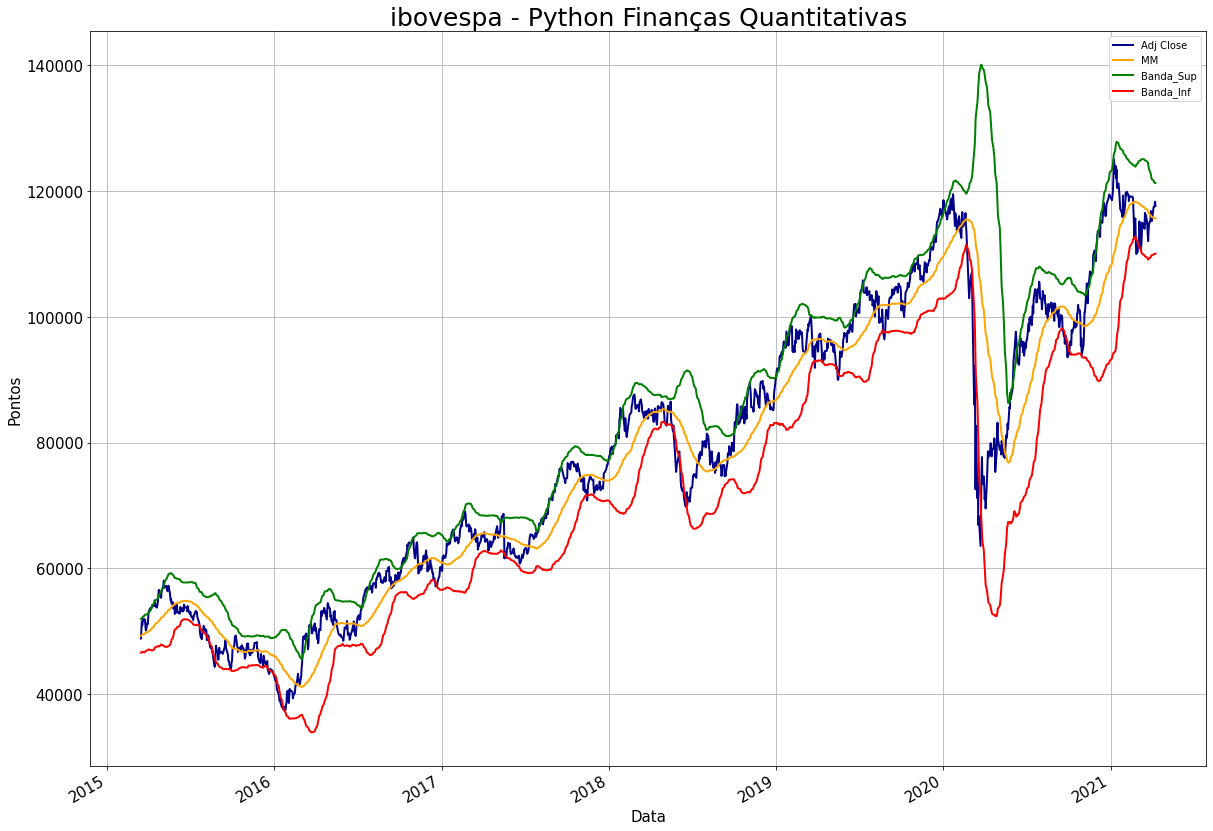

In [8]:
# Inserindo tudo no grafico


df[["Adj Close", "MM", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 15)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "red"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

In [9]:
# Construcao dos alvos

periodos = 5

# Alvo - Retorno
df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos)

D:\Anaconda3\envs\OMNP\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda3\envs\OMNP\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2015-03-16,48602.0,49205.0,48394.0,48848.0,48848.0,3155400,1342.718632,49279.32,51964.757264,46593.882736,NaN,0.062643
2015-03-17,48849.0,50384.0,48841.0,50285.0,50285.0,4013900,1345.449736,49314.78,52005.679471,46623.880529,NaN,0.024282
2015-03-18,50284.0,51773.0,49788.0,51526.0,51526.0,4458900,1355.544577,49394.96,52106.049154,46683.870846,NaN,0.006443
2015-03-19,51530.0,51547.0,50791.0,50954.0,50954.0,3263600,1357.899270,49454.02,52169.818541,46738.221459,NaN,-0.007340
2015-03-20,50964.0,52286.0,50964.0,51967.0,51967.0,4916800,1403.641172,49504.10,52311.382345,46696.817655,NaN,-0.036023


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2021-04-05,115262.0,117668.0,115262.0,117518.0,117518.0,7245100,2934.552427,115788.82,121657.924854,109919.715146,0.023845,NaN
2021-04-06,117519.0,118213.0,117176.0,117499.0,117499.0,6800800,2860.128138,115725.34,121445.596275,110005.083725,0.018021,NaN
2021-04-07,117499.0,118303.0,116748.0,117624.0,117624.0,0,2815.745753,115683.66,121315.151507,110052.168493,0.006624,NaN
2021-04-08,117624.0,118850.0,117486.0,118313.0,118313.0,8778200,2813.204712,115681.06,121307.469424,110054.650576,0.014395,NaN
2021-04-09,118313.0,118643.0,117336.0,117670.0,117670.0,7739400,2819.465635,115691.02,121329.951271,110052.088729,0.020971,NaN


In [12]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

In [13]:
# Criando a regra de trade

df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

In [14]:
# Aplicando a regra no alvo

df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]

In [15]:
# Calculando o resultado acumulado em juros simples

df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()

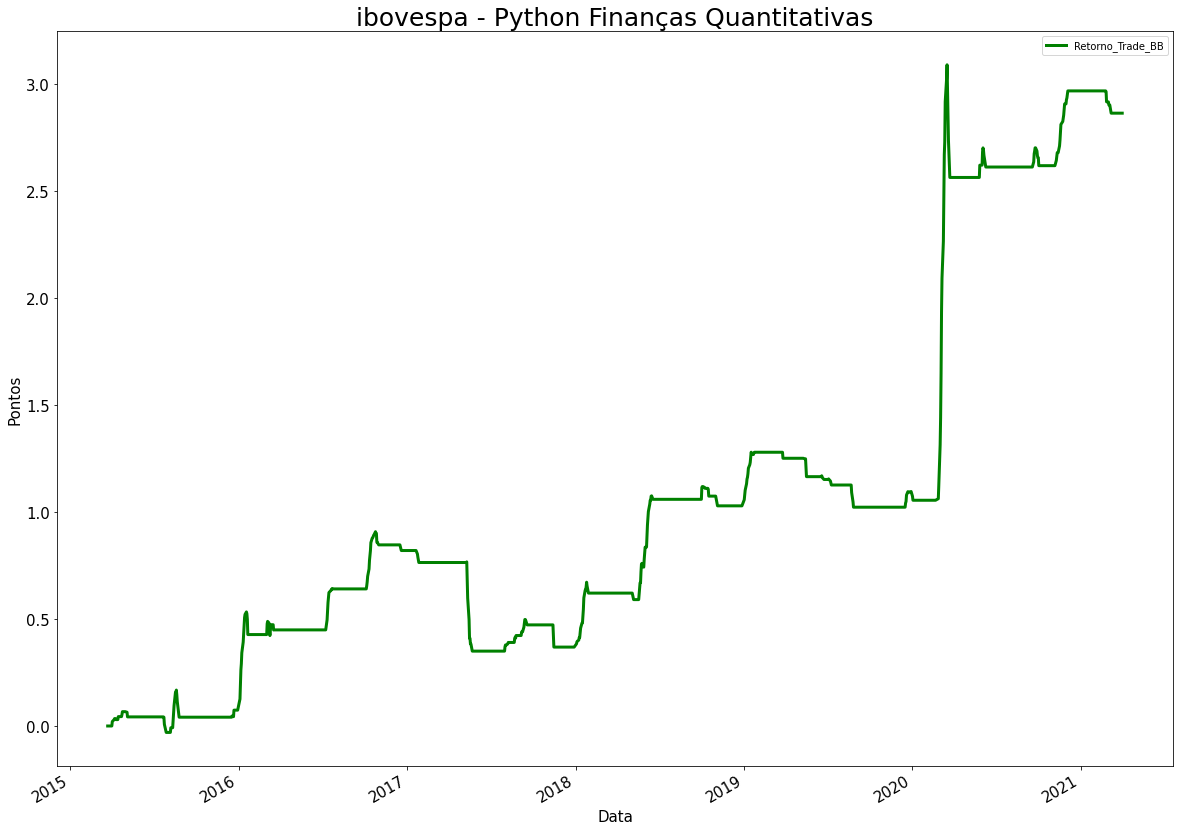

In [16]:
df["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

In [17]:
# Testes adicionais:
# O que acontece quando fazendo com 21 dias e alvos em 5 e 10 periodos?
# E quando fazemos para um periodo de 50 dias e alvo em 10 periodos?